# 1. 原始資料集匯入

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flights.csv', encoding='big5') 
df.sample(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4941136,2015,11,5,4,OO,5571,N956SW,DEN,MOT,955,958.0,3.0,43.0,1041.0,118.0,...,77.0,604,1258.0,4.0,1253,1302.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2966876,2015,7,5,7,UA,1919,N12218,IAH,SAN,2118,2123.0,5.0,28.0,2151.0,192.0,...,160.0,1303,2231.0,4.0,2230,2235.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2822739,2015,6,26,5,WN,3047,N8658A,AUS,LAS,2020,2015.0,-5.0,8.0,2023.0,165.0,...,149.0,1090,2052.0,7.0,2105,2059.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5512770,2015,12,12,6,AA,1461,N3EHAA,MIA,TPA,705,659.0,-6.0,15.0,714.0,63.0,...,38.0,204,752.0,3.0,808,755.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4739440,2015,10,23,5,DL,1189,N343NW,14869,10821,940,936.0,-4.0,15.0,951.0,254.0,...,218.0,1865,1529.0,7.0,1554,1536.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# 2. 原始資料集預處理

In [9]:
df_AIRLINE = pd.get_dummies(df['AIRLINE'])   
df_AIRLINE.head()

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df2 = df[['ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME', 'DIVERTED', 'CANCELLED']]
df2.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DIVERTED,CANCELLED
0,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,0,0
1,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,0,0
2,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,0,0
3,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,0,0
4,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,0,0


In [29]:
df3 = pd.merge(df2,df_AIRLINE,left_index=True,right_index=True)  # 把左右二個index相同的dataframe做合併
df3.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DIVERTED,CANCELLED,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
#missing data
total = df3.isnull().sum().sort_values(ascending=False)
percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ARRIVAL_DELAY,105071,0.018056
ELAPSED_TIME,105071,0.018056
ARRIVAL_TIME,92513,0.015898
DEPARTURE_TIME,86153,0.014805
DEPARTURE_DELAY,86153,0.014805
SCHEDULED_TIME,6,0.000001
WN,0,0.000000
VX,0,0.000000
DESTINATION_AIRPORT,0,0.000000
SCHEDULED_DEPARTURE,0,0.000000


# 3. Classification with Keras MLP 

In [26]:
df3.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split

X = df3.drop(['CANCELLED'],axis=1) #去除依變量
y = df3[['CANCELLED']]
y.head()

,CANCELLED
0,0
1,0
2,0
3,0
4,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

In [32]:
X.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DIVERTED,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
airlines_names = pd.read_csv('airlines.csv')
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [46]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [47]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)

In [48]:
origin_nb = dict()
for carrier in abbr_companies.keys():
    liste_origin_airport = df[df['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)

/Users/huangyuzhen/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


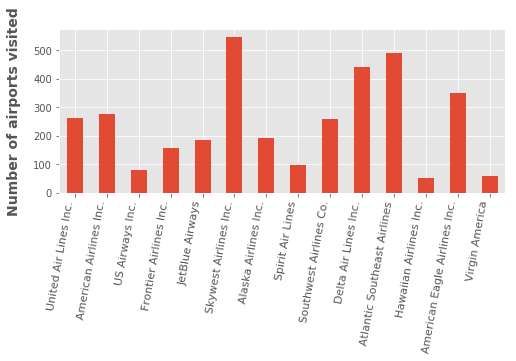

In [49]:
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbr_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()


In [88]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [89]:
temp = pd.read_csv('airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()

In [90]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean']

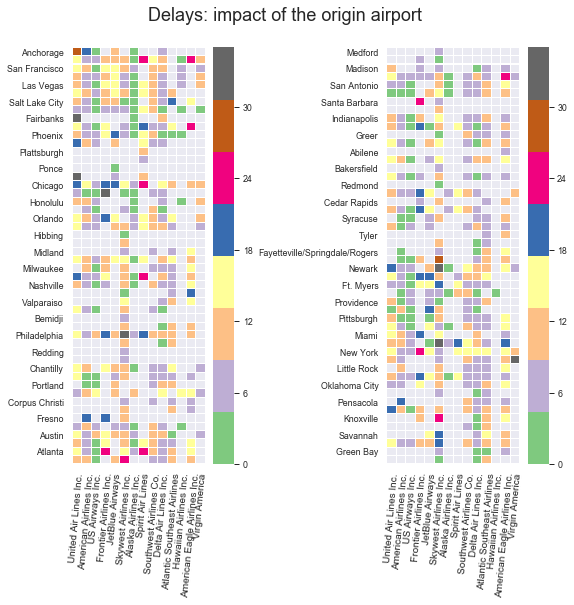

In [91]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()